## Table of Content
### Exploratory Data Analysis
* [0. Importing Libraries](#c0)
* [1. Problem statement and data collection](#c1)
* [2. Exploration and data cleaning](#c2)
    * [2.1 Understanding the features](#s21)
    * [2.2 Identifying Duplicated and Null Values](#s22)
    * [2.3 Eliminating Irrelevant Information and dealing with null values](#s23)
* [3. Univariate Analysis](#c3)
    * [3.1 Dividing our dataset into categorial and numerical.](#s31)
    * [3.2 Categorical Variable Analysis](#s32) 
    * [3.3 Numerical Variable Analysis](#s33)
* [4. Multivariate Analysis](#c4)
    * [4.1 Encoding Categorical Values and Saving JSON files](#s41)
    * [4.2 Numerical-Categorical Analysis (Correlation Analysis)](#s42)
* [5. Feature Engineering](#c5)
    * [5.1 New feature Inference](#s51)
    * [5.2 Outlier Analysis](#s52)
    * [5.3 Split train/test of both Data Frames](#s53)
    * [5.4 Normalization](#s54)
    * [5.5 Min-Max Scaling](#s55)
* [6. Feature Selection](#c6)
    * [6.1 Applying the Feature Filter to the Scaled Data Frames](#s61)
    * [6.2 Saving the CSV files](#s62)
### Machine Learning 
* [7.1 Decision Making: Which is the best dataset?](#s71)
* [7.2 Model Optimization](#s72)

## Exploratory Data Analysis (EDA) 

### 0. Importing Libraries <a class="anchor" id="c0"></a>

In [85]:
# Your code here
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import json
from pickle import dump

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1. Problem statement and data collection <a class="anchor" id="c1"></a>

In [6]:
df = pd.read_csv("../data/raw/demographic_health_data.csv")
df.head(3)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.36

----------------------------------------------------------------

### 2. Exploration and data cleaning <a class="anchor" id="c2"></a>

#### 2.1 Understanding the features <a id="s21"></a>
Only the features that are not immediately clear upon reading are explained, as the others are straightforward. 
- ```fips```: FIPS Code for the County
- ```TOT_POP```: Total Population
- ```N_POP_CHG_2018```: Numeric Change in resident total population 7/1/2017 to 7/1/2018
- ```GQ_ESTIMATES_2018```: 7/1/2018 Group Quarters total population estimate
- ```R_birth_2018```: Birth rate in period 7/1/2017 to 6/30/2018
- ```R_death_2018```: Death rate in period 7/1/2017 to 6/30/2018
- ```R_NATURAL_INC_2018```: Natural increase rate in period 7/1/2016 to 6/30/2017
- ```R_INTERNATIONAL_MIG_2018```: Net international migration rate in period 7/1/2017 to 6/30/2018
- ```R_DOMESTIC_MIG_2018```: Net domestic migration rate in period 7/1/2017 to 6/30/2018
- ```R_NET_MIG_2018```: Net migration rate in period 7/1/2017 to 6/30/2018
- ```Less than a high school diploma 2014-18```: Education variables are self explanatory, first 4 are number and second 4 are %
- ```POVALL_2018```: Estimate of people of all ages in poverty 2018
- ```PCTPOVALL_2018```: Estimated percent of people of all ages in poverty 2018
- ```PCTPOV017_2018```: Estimated percent of people age 0-17 in poverty 2018
- ```PCTPOV517_2018```: Estimate of related children age 5-17 in families in poverty 2018
- ```MEDHHINC_2018```: Estimate of median household income 2018
- ```CI90LBINC_2018```: 90% confidence interval lower bound of estimate of median household income 2018
- ```CI90UBINC_2018```: 90% confidence interval upper bound of estimate of median household income 2018
- ```Civilian_labor_force_2018```: Civilian labor force annual average
- ```Employed_2018```: Number employed annual average
- ```Unemployed_2018```: Number unemployed annual average
- ```Unemployment_rate_2018```: Unemployment rate
- ```Med_HH_Income_Percent_of_State_Total_2018```: County Household Median Income as a percent of the State Total Median Household Income, 2018
- ```Active Physicians per 100000 Population 2018 (AAMC)```: Total Active Patient Care Physicians per 100,000 Population, 2018 (Assumed identical to state)
- ```Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)```: Active Primary Care Physicians per 100,000 Population, 2018 (Assumed identical to state)
- ```Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)```: Active Patient Care Primary Care Physicians per 100,000 Population, 2018 (Assumed identical to state)
- ```Active General Surgeons per 100000 Population 2018 (AAMC)```: Active General Surgeons per 100,000 Population, 2018 (Assumed identical to state)
- ```Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)```: Active Patient Care General Surgeons per 100,000 Population, 2018 (Assumed identical to state)
- ```Total nurse practitioners (2019)```: Total nurses (2019) (Assumed proportion to fraction of state population living in county
- ```Total physician assistants (2019)```: Total physical assistants (2019) (Assumed proportion to fraction of state population living in county
- ```Total Hospitals (2019)```: Total Hospitals (2019) (Assumed proportion to fraction of state population living in county)
- ```Internal Medicine Primary Care (2019)```: Active Internal Medicine Primary Care Physicians (2019) (Assumed proportion to fraction of state population living in county)
- ```Family Medicine/General Practice Primary Care (2019)```: Active Family Medicine/General Practice Primary Care Physicians (2019) (Assumed proportion to fraction of state population living in county)
- ```Total Specialist Physicians (2019)```: Sum of Psychiatry, Surgery, Anesthesiology, Emergency Med, Radiology, Cardiology, Oncology, Endocrinology, and Other specialists (2019) (Assumed proportion to fraction of state population living in county
- ```ICU Beds_x```: Number of ICU beds per county
- ```STATE_FIPS```: FIPS Code for the State
- ```county_pop2018_18 and older```: Population aged 18+ per county in 2018
- ```anycondition_prevalence```: A prevalence rate is the total number of cases of a disease existing in a population divided by the total population.
- ```anycondition_Lower 95% CI```: CI means confidence interval
- ```anycondition_number```: Population with anycondition
- ```Obesity_number```: Population with Obesity
- ```Heart disease_number```: Population with Heart Disease
- ```COPD_number```: Population with COPD
- ```diabetes_number```: Population with diabetes
- ```CKD_number```: Population with CKD
- ```Urban_rural_code```: It distinguishes metropolitan (metro) counties by the population size of the r metro area, and nonmetropolitan (nonmetro) counties by degree of urbanizion and adjacency to a metro area or areas. 


In [10]:
print('Our dataframe contains {} rows and it has {} features.'.format(len(df), df.shape[1]))

Our dataframe contains 3140 rows and it has 108 features.


----------------------------------------------------------------

#### 2.2 Identifying Duplicated and Null Values <a id="s22"></a>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [14]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [15]:
df['fips'].duplicated().sum()

0

##### Conclusions: 
We do not have any nulls neither duplicated values in the dataframe and we have categorical and numerical features. 

----------------------------------------------------------------

##### 2.3 Eliminating Irrelevant Information and dealing with null values <a id="s23"></a>

In [19]:
# Dropping all the initial percentages from age population
df = df.drop(df.columns[np.arange(1, 32,2)], axis=1) 

# Dropping unnecessary columns for our model 
df = df.drop(columns=['Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', 
                      "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18",
                      "Percent of Population Aged 60+", 'fips', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 
                     'Obesity_Upper 95% CI', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI',
                     'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'Unemployment_rate_2018', 'anycondition_prevalence', 'CI90LBINC_2018', 'CI90UBINC_2018',
                     'COPD_Lower 95% CI', 'COPD_Upper 95% CI'])

# Renaming the columns adding spaces and removing slashes
new_name = {}

for name in df.columns:
    new_name[name] = name.replace(" ","_").replace("/","-")

df = df.rename(columns=new_name)

In [20]:
df.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone_pop,Black-alone_pop,Native_American-American_Indian-alone_pop,Asian-alone_pop,Hawaiian-Pacific_Islander-alone_pop,Two_or_more_races_pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less_than_a_high_school_diploma_2014-18,High_school_diploma_only_2014-18,Some_college_or_associate's_degree_2014-18,Bachelor's_degree_or_higher_2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active_Physicians_per_100000_Population_2018_(AAMC),Total_Active_Patient_Care_Physicians_per_100000_Population_2018_(AAMC),Active_Primary_Care_Physicians_per_100000_Population_2018_(AAMC),Active_Patient_Care_Primary_Care_Physicians_per_100000_Population_2018_(AAMC),Active_General_Surgeons_per_100000_Population_2018_(AAMC),Active_Patient_Care_General_Surgeons_per_100000_Population_2018_(AAMC),Total_nurse_practitioners_(2019),Total_physician_assistants_(2019),Total_Hospitals_(2019),Internal_Medicine_Primary_Care_(2019),Family_Medicine-General_Practice_Primary_Care_(2019),Total_Specialist_Physicians_(2019),ICU_Beds_x,Total_Population,Population_Aged_60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18_and_older,anycondition_number,Obesity_prevalence,Obesity_number,Heart_disease_prevalence,Heart_disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,7587,13.8,19.3,19.5,59338,25957,25015,942,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,Autauga,Alabama,1,1,42438,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,21069,9.8,13.9,13.1,57588,93849,90456,3393,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,Baldwin,Alabama,1,3,170912,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,6788,30.9,43.9,36.7,34382,8373,7940,433,34382,68.9,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,Barbour,Alabama,1,5,19689,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,22400,-155,2151,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,4400,21.8,27.8,26.3,46064,8661,8317,344,46064,92.3,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,4773,Bibb,Alabama,1,7,17813,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,57840,13,489,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,7527,13.2,18.0,15.5,50412,25006,24128,878,50412,101.1,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,13600,Blount,Alabama,1,9,44448,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2


**Note:**

All removed features are related to rates or percentages that can be derived from the existing data in the remaining features.

----------------------------------------------------------------

### 3. Univariate Analysis <a class="anchor" id="c3"></a>

#### 3.1 Dividing our dataset into categorial and numerical. <a id="s31"></a>

In [25]:
# Understanding how many type of features we have
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [26]:
# Dividing our dataframe by numerical and categorical features
num = ['int64', 'float64']
cat = ['O']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

----------------------------------------------------------------

#### 3.2 Categorical Variable Analysis <a id="s32"></a>

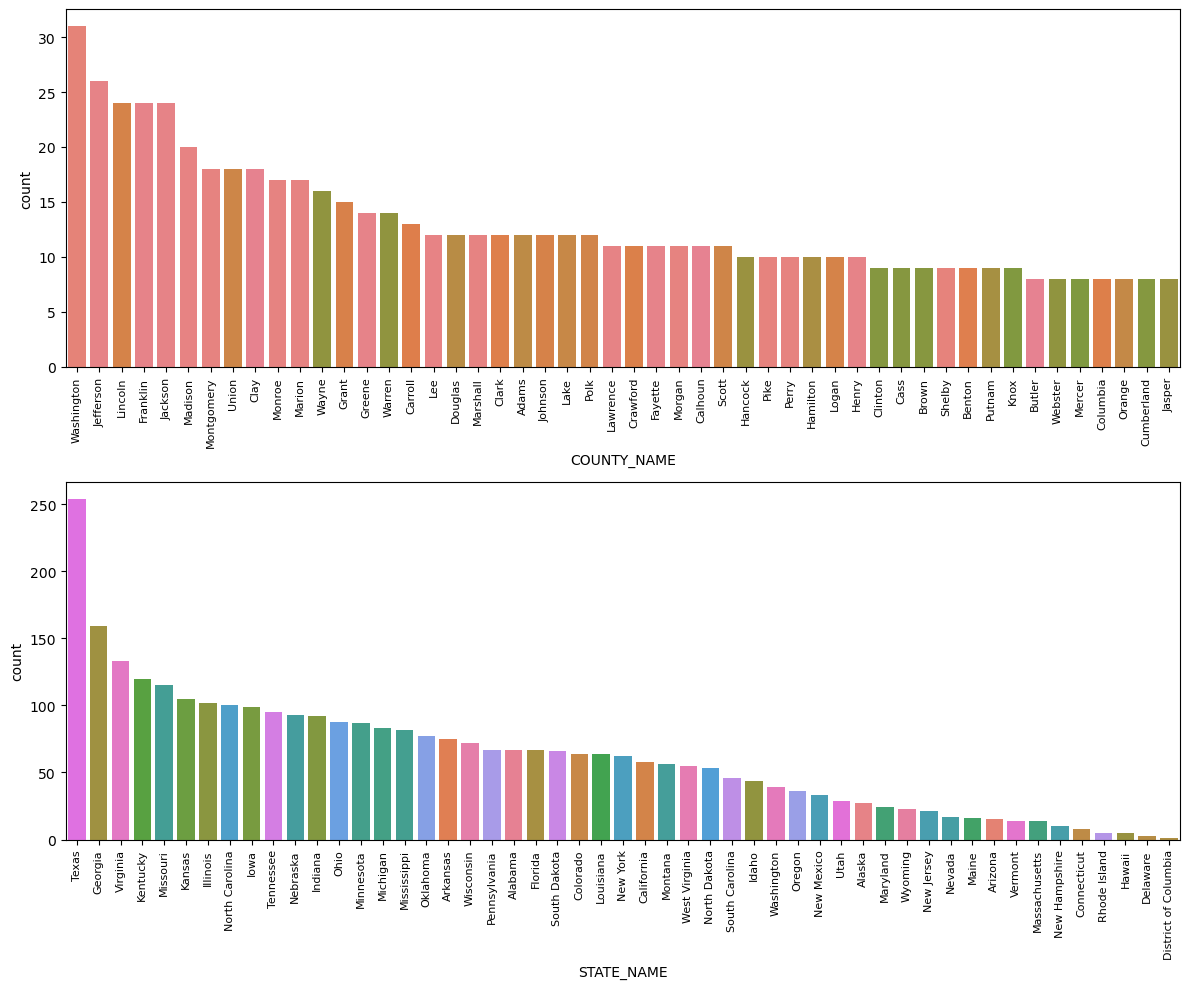

In [29]:
fig, ax = plt.subplots(2, 1, figsize = (12, 10))

sns.countplot(ax= ax[0], data = df_cat, x = 'COUNTY_NAME', order=df_cat['COUNTY_NAME'].value_counts().index[:50], hue='COUNTY_NAME')
sns.countplot(ax = ax[1], data = df_cat, x = 'STATE_NAME', order=df_cat['STATE_NAME'].value_counts().index, hue='STATE_NAME')

for a in ax:
    a.set_xticklabels(a.get_xticklabels(), fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

##### Conclusions

- Texas has significantly more counties than any other state, indicating it has a unique administrative structure compared to other states.
- Some Southern and Midwestern states, like Georgia and Kentucky, also have relatively high county counts, suggesting a pattern where these regions tend to have more subdivisions.
- Smaller or more urbanized states, especially in the Northeast and West, have fewer counties, which may reflect a preference for centralized governance in these areas. 

---------------------------------------------------------------

#### 3.3 Numerical Variable Analysis <a id="s33"></a>

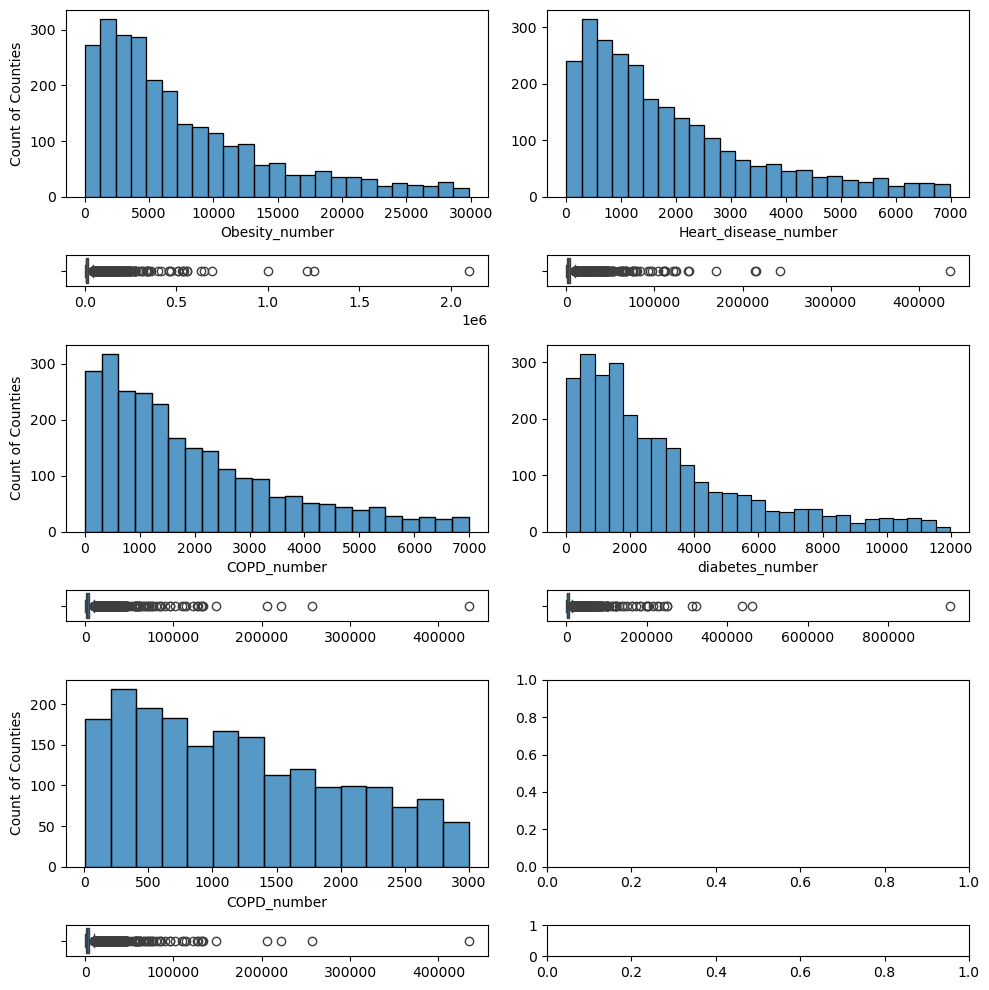

In [33]:
fig, ax = plt.subplots(6, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Charts first row 
sns.histplot(ax = ax[0,0], data = df_num[df_num['Obesity_number']<30000], x='Obesity_number').set(ylabel='Count of Counties')
sns.boxplot(ax = ax[1,0], data = df_num, x='Obesity_number').set(xlabel = None)
sns.histplot(ax = ax[0,1], data = df_num[df_num['Heart_disease_number']<7000], x='Heart_disease_number').set(ylabel = None)
sns.boxplot(ax = ax[1,1], data = df_num, x='Heart_disease_number').set(xlabel = None)

# Charts second row 
sns.histplot(ax = ax[2,0], data = df_num[df_num['COPD_number']<7000], x='COPD_number').set(ylabel='Count of Counties')
sns.boxplot(ax = ax[3,0], data = df_num, x='COPD_number').set(xlabel = None)
sns.histplot(ax = ax[2,1], data = df_num[df_num['diabetes_number']<12000], x='diabetes_number').set(ylabel = None)
sns.boxplot(ax = ax[3,1], data = df_num, x='diabetes_number').set(xlabel = None)

# Charts third row
sns.histplot(ax = ax[4,0], data = df_num[df_num['COPD_number']<3000], x='COPD_number').set(ylabel='Count of Counties')
sns.boxplot(ax = ax[5,0], data = df_num, x='COPD_number').set(xlabel = None)

plt.tight_layout()
plt.show()

##### Conclusions
- **Skewed Distributions**: The distributions for obesity, heart disease, COPD, and diabetes are all right-skewed. This suggests that, in most counties, the number of cases for each condition is relatively low, with only a few counties experiencing very high counts.
- **Presence of Outliers**: Each variable has notable outliers, as seen in the boxplots below each histogram. These outliers indicate that some counties have significantly higher counts of these health conditions compared to the majority, which could be due to population size, demographic factors, or specific health risks in those areas.
- **Similar Trends Across Conditions**: The similar shape of distributions for each condition suggests that they may share common contributing factors or risk patterns across counties, such as lifestyle, socioeconomic factors, or access to healthcare.

----------------------------------------------------------------

### 4. Multivariate Analysis <a class="anchor" id="c4"></a>

#### 4.1 Encoding Categorical Values and Saving JSON files <a id="s41"></a>

In [38]:
df_enc = df.copy()

In [39]:
# Creating encoders for categorical features and saving them as JSON files. All files prefixed with 'enc'
# contain the encoding dictionaries for each categorical feature.
for column in df_cat.columns:
    unique_values = list(df_cat[column].unique())
    globals()[f"{column}_enc"] = dict(zip(unique_values, range(len(unique_values))))

    json.dump(globals()[f"{column}_enc"], open(f'../data/interim/enc_{column}.json', 'w'))

In [40]:
# Replacing the values in our categorical features to our encoded values (numerical)
for column in df_cat.columns:
    df_enc[column] = df_enc[column].map(json.load(open(f'../data/interim/enc_{column}.json')))

----------------------------------------------------------------

#### 4.2 Numerical-Categorical Analysis (Correlation Analysis) <a id="s42"></a>

In [43]:
corr = ['White-alone_pop', 'Black-alone_pop', 'Native_American-American_Indian-alone_pop', 'Asian-alone_pop', 'Hawaiian-Pacific_Islander-alone_pop',
         'Two_or_more_races_pop', 'Employed_2018', 'POP_ESTIMATE_2018', 'Unemployed_2018', 'Total_nurse_practitioners_(2019)',
         'Total_physician_assistants_(2019)', 'Total_Hospitals_(2019)', 'Internal_Medicine_Primary_Care_(2019)', 
        'Family_Medicine-General_Practice_Primary_Care_(2019)', 'Total_Specialist_Physicians_(2019)', 'Population_Aged_60+', 'STATE_NAME',
         'Obesity_number', 'Heart_disease_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Urban_rural_code', 'anycondition_number']


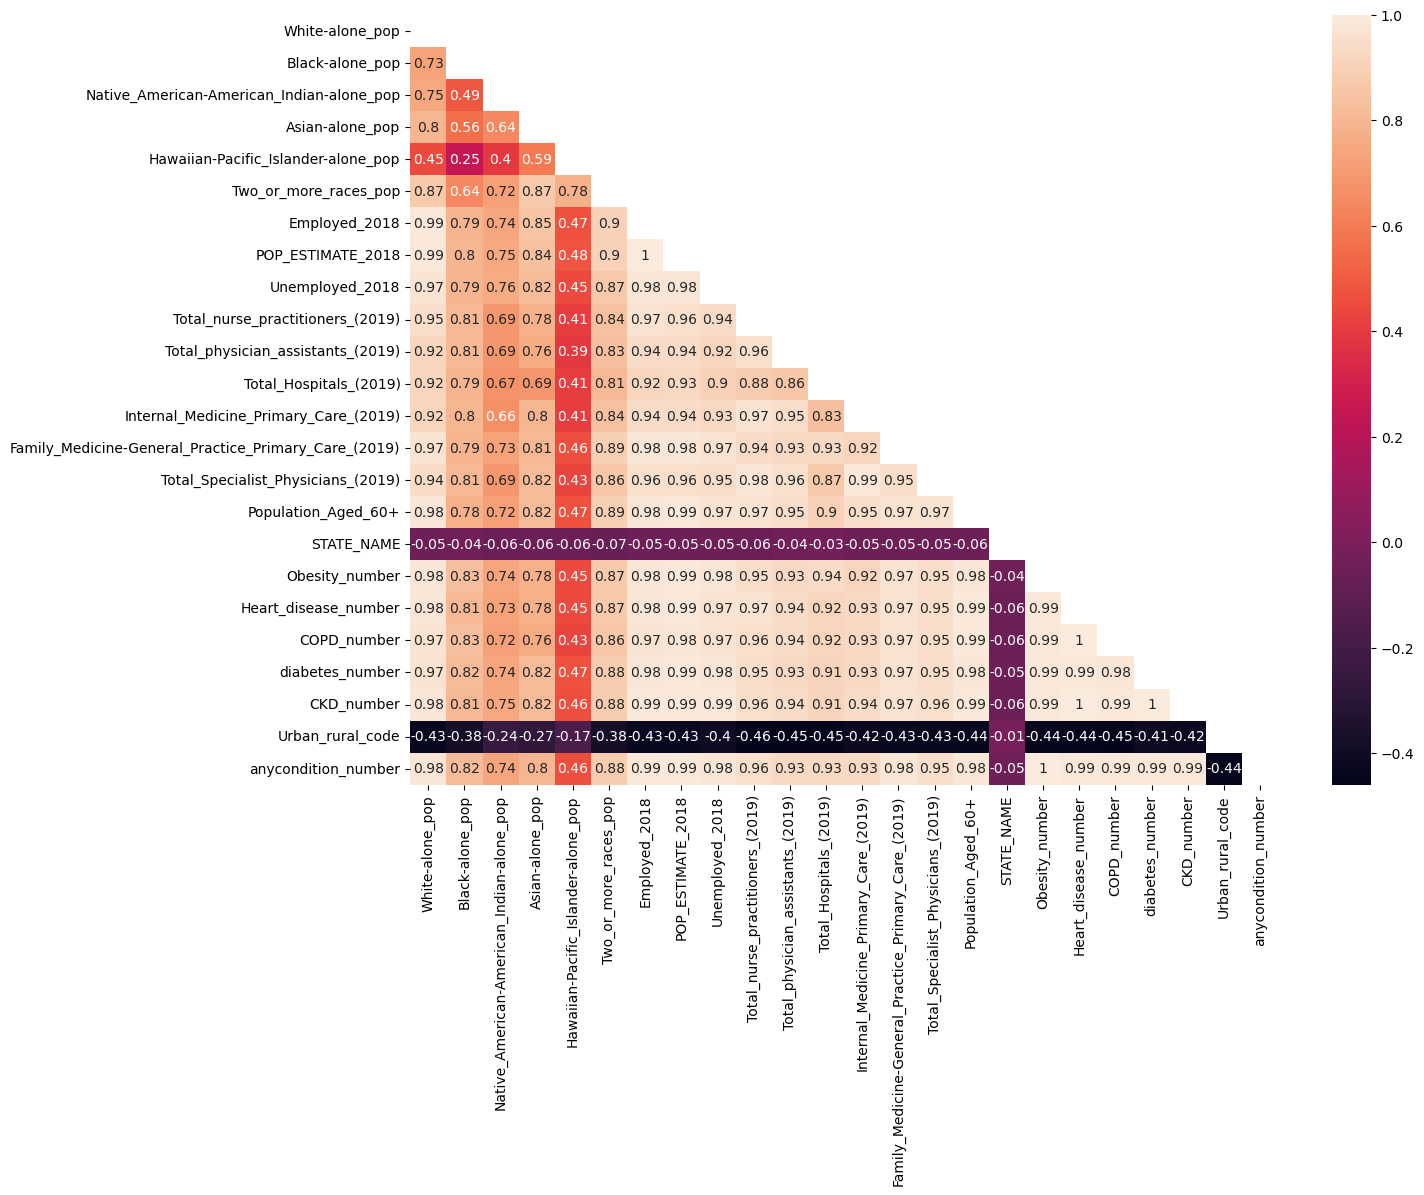

In [44]:
plt.figure(figsize=(14,10))
sns.heatmap(df_enc[corr].corr().round(2), annot=True, mask=np.triu(df_enc[corr].corr()))
plt.show()

###### Conclusions:
- **High Positive Correlation with Other Health Conditions:** ```anycondition_number``` is very strongly correlated with ```Obesity_number```, ```Heart disease_number```, ```COPD_number```, ```diabetes_number```, and ```CKD_number``` (all with correlation coefficients close to or above 0.98). This suggests that counties with high cases in one condition tend to have high cases across other health conditions as well, indicating possible comorbidities or shared risk factors.
- **Strong Correlation with Healthcare Resources:** ```anycondition_number``` also shows a strong positive correlation with healthcare resources like ```Total nurse practitioners```, ```Total physician assistant```s, and ```Total hospitals``` (correlation coefficients above 0.9). This may imply that counties with more prevalent health conditions have a larger healthcare workforce, possibly due to increased demand for medical services.
- **Correlation with Population Demographics:** There is a high correlation between ```anycondition_number``` and ```Population Aged 60+``` (around 0.99), suggesting that counties with older populations tend to report higher instances of health conditions, which aligns with the increased risk of chronic health issues in older age groups. Additionally, ```POP_ESTIMATE_2018``` (population estimate) also correlates highly, indicating that larger counties may have more health cases simply due to higher population.

-------------------------------------------------------

### 5. Feature Engineering <a class="anchor" id="c5"></a>

#### 5.1 New feature Inference <a id="s51"></a>

No new features will be created in this analysis, as the current set of variables is deemed sufficient for accurately capturing the relationships and insights needed for predicting medical conditions.

-------------------------------------------------------

#### 5.2 Outlier Analysis <a id="s52"></a>

Perform an outlier analysis exclusively on continuous features; outliers in discrete features should be addressed separately without changing their data. 

In [53]:
df_enc.describe().round(2)

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone_pop,Black-alone_pop,Native_American-American_Indian-alone_pop,Asian-alone_pop,Hawaiian-Pacific_Islander-alone_pop,Two_or_more_races_pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less_than_a_high_school_diploma_2014-18,High_school_diploma_only_2014-18,Some_college_or_associate's_degree_2014-18,Bachelor's_degree_or_higher_2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active_Physicians_per_100000_Population_2018_(AAMC),Total_Active_Patient_Care_Physicians_per_100000_Population_2018_(AAMC),Active_Primary_Care_Physicians_per_100000_Population_2018_(AAMC),Active_Patient_Care_Primary_Care_Physicians_per_100000_Population_2018_(AAMC),Active_General_Surgeons_per_100000_Population_2018_(AAMC),Active_Patient_Care_General_Surgeons_per_100000_Population_2018_(AAMC),Total_nurse_practitioners_(2019),Total_physician_assistants_(2019),Total_Hospitals_(2019),Internal_Medicine_Primary_Care_(2019),Family_Medicine-General_Practice_Primary_Care_(2019),Total_Specialist_Physicians_(2019),ICU_Beds_x,Total_Population,Population_Aged_60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18_and_older,anycondition_number,Obesity_prevalence,Obesity_number,Heart_disease_prevalence,Heart_disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
count,3140.0,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,12740.3,13367.98,14469.33,13916.49,12885.21,13638.03,11916.21,7220.31,4035.54,79659.79,13950.26,1320.23,6155.62,254.56,2848.95,104189.41,643.42,2576.34,11.17,10.37,0.80,1.11,0.00,1.12,8581.99,18873.29,20179.19,21931.44,13328.31,15.16,21.11,19.88,52767.08,51475.58,49470.48,2005.10,52767.08,89.41,254.92,226.16,87.96,80.07,7.62,6.78,52.70,28.22,1.66,62.90,44.39,167.33,23.82,102226.63,21322.98,688.48,26.25,30.30,103.55,80814.60,33385.40,35.02,25276.13,8.61,5597.59,9.10,5827.24,13.07,9326.58,3.45,2466.23,4.64
std,41807.3,42284.39,49577.73,48990.95,43472.19,42720.63,34518.58,20287.50,12063.78,237288.05,58997.87,5362.40,43887.98,2192.08,11083.92,333583.40,3134.86,6709.18,2.52,2.69,4.06,2.17,11.45,11.39,37238.15,50828.58,60863.91,79774.84,45609.73,6.13,8.91,8.78,13907.99,168789.56,161957.01,6971.12,13907.99,20.14,42.29,31.54,12.57,10.49,1.29,1.13,153.88,86.41,4.29,214.74,133.35,543.04,84.60,328387.85,61405.88,541.77,14.26,15.13,107.69,258518.99,98886.69,4.52,74466.84,1.76,15615.29,2.34,15720.55,2.72,29754.60,0.57,7730.42,1.51
min,0.0,0.00,0.00,11.00,4.00,14.00,20.00,6.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,88.00,-24009.00,0.00,0.00,0.00,-14.40,-3.90,-62.30,-62.10,4.00,15.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,191.30,174.80,65.30,61.20,5.60,5.00,0.03,0.01,0.00,0.05,0.03,0.11,0.00,74.00,27.00,0.00,0.00,1.00,1.00,88.00,41.00,15.20,25.00,3.50,7.00,3.50,7.00,6.10,11.00,1.80,3.00,1.00
25%,1280.5,1374.50,1263.75,1232.75,1245.25,1483.00,1476.50,950.75,533.00,9008.75,142.00,73.00,57.00,5.00,180.00,10963.25,-78.00,174.75,9.70,8.70,-1.80,0.00,-6.20,-5.00,992.75,2803.75,2295.25,1201.75,1597.00,10.80,14.50,13.40,43677.00,4921.00,4714.50,200.75,43677.00,76.20,227.60,202.90,79.10,72.90,6.90,6.10,5.44,2.48,0.25,4.84,5.31,14.74,0.00,10967.00,2814.75,182.00,

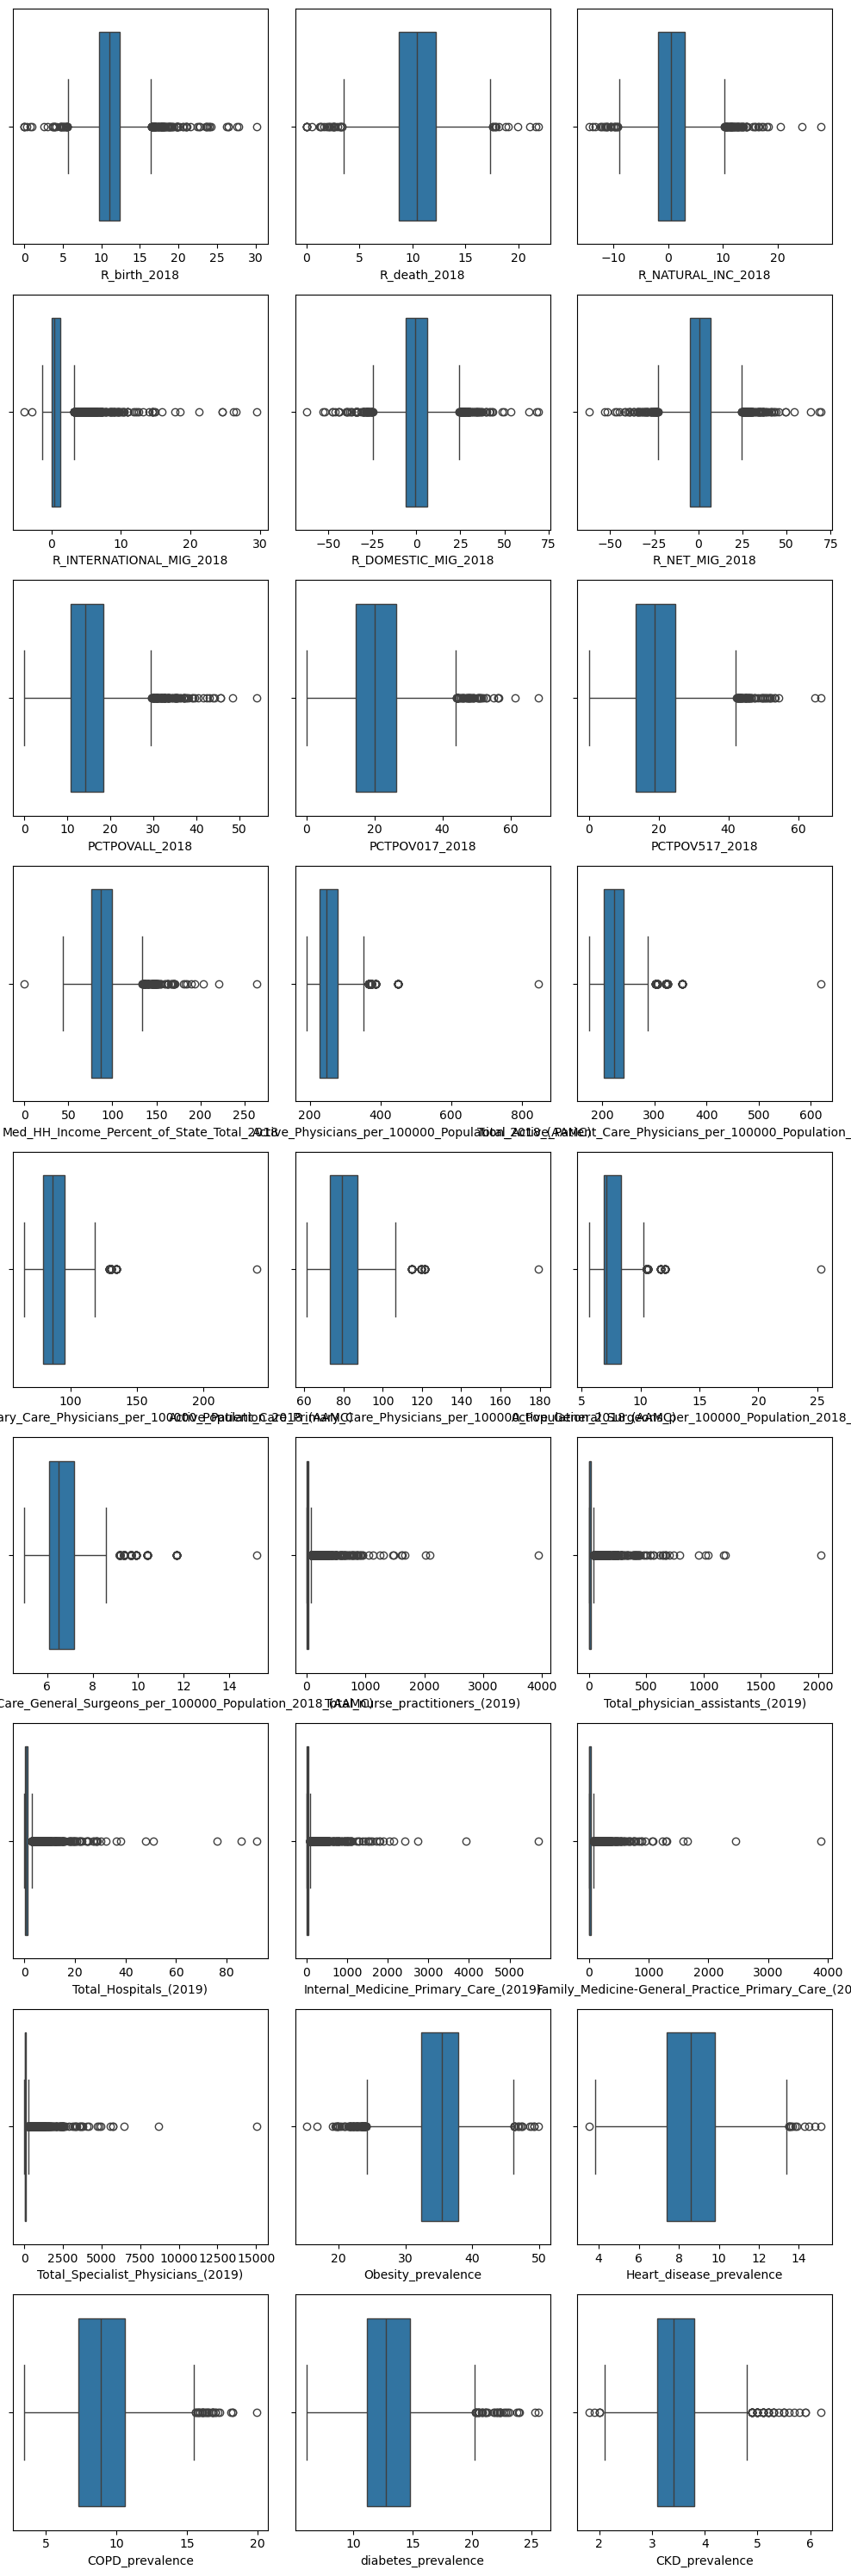

In [54]:
continuos_f = list(df_enc.select_dtypes('float64'))

fig, ax = plt.subplots(9,3, figsize=(10, 30))

row, col = 0, 0
for each in continuos_f:
    sns.boxplot(ax = ax[row,col], data = df_enc, x=each)
    col += 1
    if col == 3: 
        row += 1 
        col = 0

plt.tight_layout()
plt.show()

We will calculate the outlier limits for all continuous features and use them to create a new dataframe without outliers (```df_enc_no```). This outlier-free dataset will be used to train our model and compare performance, helping us identify the best approach.

In [56]:
# Creating a copy of our df to remove outliers 
df_enc_no = df_enc.copy()

In [57]:
# This function returns our new df without outliers and the features' limits.  
def remove_outliers(x, feature_name, allow_neg=True):
    q1, q3 = x.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_lim = q3 + (iqr*1.5)
    lower_lim = q1 - (iqr*1.5) if allow_neg else max(0, q1 - (iqr * 1.5))

    x = x.apply(lambda x: upper_lim if (x > upper_lim) else (lower_lim if (x < lower_lim) else x))

    filename = f'../data/interim/outliers_lims_{feature_name}.json'
    json.dump({'upper_lim': upper_lim, 'lower_lim': lower_lim}, open(filename, 'w'))

    return x

In [58]:
f_outliers_with_neg = []
f_outliers_no_neg = []

for each in continuos_f:
    if df_enc[each].min() < 0:
        f_outliers_with_neg.append(each)
    f_outliers_no_neg.append(each)

for feature in f_outliers_with_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature)

for feature in f_outliers_no_neg:
    df_enc_no[feature] = remove_outliers(df_enc_no[feature], feature, allow_neg=False)

--------------------------------------------------------

#### 5.3 Split train/test of both Data Frames <a id="s53"></a>

In [61]:
def split(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

Now, we split our data into train and test sets using the function ```split``` created earlier. This will be for all necessary data frames created earlier (original, normalized, and min-max scaled for both, with outliers and without outliers).

In [63]:
# Split original dataframe 
X_train_with_outliers, X_test_with_outliers, y_train, y_test = split('Heart_disease_number', df_enc)
X_train_without_outliers, X_test_without_outliers, _, _ = split('Heart_disease_number', df_enc_no)

X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers.csv', index=False)
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

In [64]:
X_test_with_outliers.head()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone_pop,Black-alone_pop,Native_American-American_Indian-alone_pop,Asian-alone_pop,Hawaiian-Pacific_Islander-alone_pop,Two_or_more_races_pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less_than_a_high_school_diploma_2014-18,High_school_diploma_only_2014-18,Some_college_or_associate's_degree_2014-18,Bachelor's_degree_or_higher_2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active_Physicians_per_100000_Population_2018_(AAMC),Total_Active_Patient_Care_Physicians_per_100000_Population_2018_(AAMC),Active_Primary_Care_Physicians_per_100000_Population_2018_(AAMC),Active_Patient_Care_Primary_Care_Physicians_per_100000_Population_2018_(AAMC),Active_General_Surgeons_per_100000_Population_2018_(AAMC),Active_Patient_Care_General_Surgeons_per_100000_Population_2018_(AAMC),Total_nurse_practitioners_(2019),Total_physician_assistants_(2019),Total_Hospitals_(2019),Internal_Medicine_Primary_Care_(2019),Family_Medicine-General_Practice_Primary_Care_(2019),Total_Specialist_Physicians_(2019),ICU_Beds_x,Total_Population,Population_Aged_60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18_and_older,anycondition_number,Obesity_prevalence,Obesity_number,Heart_disease_prevalence,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
882,1848,2928,2901,1933,1990,2721,2816,1658,1234,19421,172,26,236,4,170,20029,-102,2001,8.9,9.3,-0.4,0.2,-5.0,-4.7,716,4397,4332,3989,1755,9.8,9.9,9.2,61807,11775,11460,315,61807,102.9,218.2,193.1,84.8,77.9,6.9,6.5,12.197075,5.413166,0.748832,8.110230,13.713777,25.936236,0,20575,5243,621,15,19,191,16320,6259,30.4,4961,7.0,6.2,1012,9.2,1494,2.8,458,6
2717,110,133,77,125,92,117,119,90,40,865,4,9,2,0,23,903,-34,0,8.7,6.5,2.2,0.0,-39.1,-39.1,51,157,210,149,70,7.8,10.2,10.2,67470,436,423,13,67470,111.3,224.8,199.9,72.9,66.5,6.2,5.4,0.311468,0.183829,0.016454,0.341671,0.302407,1.066478,0,889,255,1464,43,48,393,683,323,35.0,239,8.9,8.3,57,12.6,86,3.3,23,6
853,996,1097,874,859,888,1166,1225,853,721,8364,52,119,26,4,114,8679,-67,204,10.8,15.6,-4.8,0.0,-2.8,-2.8,488,2541,2302,1067,1171,13.9,18.5,16.3,50530,4456,4333,123,50530,84.1,218.2,193.1,84.8,77.9,6.9,6.5,5.285257,2.345642,0.324485,3.514339,5.942477,11.238734,0,8865,2842,606,15,19,133,6763,3230,36.2,2448,9.5,8.6,585,12.6,851,3.7,249,6
220,409094,404237,538232,504704,417723,412056,341224,197656,118438,2522987,184779,44035,420909,19678,150976,3343364,17896,108137,12.5,6.9,5.6,3.1,-3.2,-0.2,286008,409272,680074,848022,372148,11.5,14.9,15.1,78777,1592193,1539530,52663,78777,104.7,279.6,243.8,96.2,87.1,7.2,6.2,1302.792276,669.145352,30.342703,1890.122205,1284.535942,4967.328718,570,3283665,604412,201,4,6,73,2620956,893601,24.1,631650,5.3,5.1,133740,9.6,251137,2.7,70932,1
1970,4381,4429,4858,3904,4192,4402,4384,2814,1446,15705,13567,4303,312,17,906,34810,-362,2549,12.7,12.1,0.6,0.7,-11.7,-10.9,4771,8063,7165,3675,8637,26.9,41.8,38.4,36730,11457,10614,843,36730,68.1,255.0,223.5,86.2,78.1,7.1,6.2,15.813249,14.220861,0.375468,16.946359,13.490039,50.215531,8,35445,8246,1022,33,37,165,26926,14888,42.1,11336,10.0,11.3,3030,17.5,4724,4.3,1165,5


--------------------------------------------------------

#### 5.4 Normalization <a id="s54"></a>

In [67]:
def norm(X_train, X_test, reference: str):
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, open(f'../data/processed/normalized_{reference}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [68]:
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

--------------------------------------------------------

#### 5.5 Min-Max Scaling <a id="s55"></a>

In [71]:
def minmax(X_train, X_test, reference: str):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, open(f'../data/processed/minmax_{reference}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [72]:
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

--------------------------------------------------------

### 6. Feature Selection <a class="anchor" id="c6"></a>

In [75]:
def kselection(X_train, X_test, y_train, k, reference: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/processed/selection_model_{reference}.sav', 'wb'))

    return X_train_sel, X_test_sel  

In [76]:
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers, X_test_with_outliers, y_train, 70, 'with_outliers')
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers, X_test_without_outliers, y_train, 70, 'without_outliers')

#### 6.1 Applying the Feature Filter to the Scaled Data Frames <a id="s61"></a>

In [78]:
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

#### 6.2 Saving the CSV files <a id="s62"></a> 

In [80]:
dfs_train = {
    'X_train_with_outliers_sel': X_train_with_outliers_sel,
    'X_train_without_outliers_sel': X_train_without_outliers_sel,
    'X_train_with_outliers_norm_sel': X_train_with_outliers_norm_sel,
    'X_train_without_outliers_norm_sel': X_train_without_outliers_norm_sel,
    'X_train_with_outliers_minmax_sel': X_train_with_outliers_minmax_sel,
    'X_train_without_outliers_minmax_sel': X_train_without_outliers_minmax_sel 
}

dfs_test = {
    'X_test_with_outliers_sel': X_test_with_outliers_sel,
    'X_test_without_outliers_sel': X_test_without_outliers_sel,
    'X_test_with_outliers_norm_sel': X_test_with_outliers_norm_sel,
    'X_test_without_outliers_norm_sel': X_test_without_outliers_norm_sel,
    'X_test_with_outliers_minmax_sel': X_test_with_outliers_minmax_sel,
    'X_test_without_outliers_minmax_sel': X_test_without_outliers_minmax_sel    
}

for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)
    

--------------------------------------------------------

## Machine Learning <a class="anchor" id="c7"></a>
#### 7.1 Decision Making: Which is the best dataset? <a id="s71"></a> 

In [83]:
train, test = [], []

for name, df in dfs_train.items():
    train.append(df)
for name, df in dfs_test.items():
    test.append(df)

In [87]:
results = []

for index in range(len(train)):
    model = LinearRegression()
    train_df = train[index]
    model.fit(train_df, y_train)
    y_test_pred = model.predict(test[index])

    results.append(
        {
            'index': index,
            'df_train': list(dfs_train.keys())[index],
            'MAE': mean_absolute_error(y_test, y_test_pred).round(2),
            'RMSE': round(root_mean_squared_error(y_test, y_test_pred),2),
            "R2_score": round(r2_score(y_test, y_test_pred),5)            
        }
    )

results = sorted(results, key=lambda x: x['RMSE'])
best_ind = results[0]['index']
best_df_train = results[0]['df_train']
results[0]

{'index': 5,
 'df_train': 'X_train_without_outliers_minmax_sel',
 'MAE': 227.93,
 'RMSE': 735.92,
 'R2_score': 0.99813}

In [ ]:
print(f'Our best dataframe for our model is {best_df_train}, with a MAE of {results[0]["MAE"]}, a RMSE of {results[0]["RMSE"]} and a R2_score of {results[0]["R2_score"]}')

#### 7.2 Model Optimization <a id="s72"></a> 

In [89]:
models = [Lasso, Ridge, ElasticNet]

res2 = []
alpha = 0.1
for m in models: 
    model = m(alpha=alpha)
    model.fit(X_train_without_outliers_norm_sel, y_train)
    y_test_pred = model.predict(X_test_without_outliers_norm_sel)
    r2_score(y_test, y_test_pred)
    res2.append(
        {
            'Model': m,
            'MAE': mean_absolute_error(y_test, y_test_pred).round(2),
            'RMSE': round(root_mean_squared_error(y_test, y_test_pred),2),
            "R2_score": round(r2_score(y_test, y_test_pred),5)            
        })

res2 = sorted(res2, key=lambda x: x['RMSE'])
best_model = str(res2[0]["Model"])[-str(res2[0]["Model"])[::-1].find("."):-str(res2[0]["Model"])[::-1].find("'")-1]
mae = res2[0]["MAE"]
rmse = res2[0]["RMSE"]
r2score = res2[0]["R2_score"]

print(f'Our best model is {best_model}, with a MAE of {mae}, a RMSE of {rmse} and a R2_score of {r2score}')

Our best model is Ridge, with a MAE of 222.82, a RMSE of 708.46 and a R2_score of 0.99826


We decided to keep the hyperparameters at their default values since our R² score is already high at 0.99826.